<a href="https://colab.research.google.com/github/WeiShengL/Machine-Learning/blob/main/Week4_MNIST_CNN_(19107650).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 1
## Deadline Monday 9th November at 12pm (Noon)
*Lai Wei Sheng. S/N:19107650*

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


In [ ]:
#importing usual modules
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure


#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#importing image resolution
import matplotlib as mpl  
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['figure.dpi']=200 # dots per inch

# Obtaining Optimum Networks with Convolutional Layers

In [ ]:
mnist = keras.datasets.mnist                                                  # The original handwritten digit MNIST

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # Importing datasets from MNIST

In [ ]:
# Printing shape and size of images from datasets
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28)
Length of training set labels: 60000
Shape of testing images: (10000, 28, 28)
Length of testing set labels: 10000


## Reshape and Rescale Data
After importing the data, it has to be reshape for convolutional layers to work. 
<br>
(ie. adding a new dimension for the strength of greyscale of mnist data)

Also, data has to be rescale to have a value of 0-1.

In [ ]:
# Reshaping images
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

# Rescaling pixels of images
train_images=train_images/255.0
test_images=test_images/255.0


## Task 1
### Different Number of Kernels

First three different number of kernels (ie. 16, 32, 64) was chose to build a model and test for its accuracy to see which one works best.

Final Testing Accuracy for 16.0 kernel numbers =  0.9806
Final Testing Accuracy for 32.0 kernel numbers =  0.9812
Final Testing Accuracy for 64.0 kernel numbers =  0.9814


Text(0.5, 1.0, 'Plot of  Validation Accuracy for Different Number of Kernel')

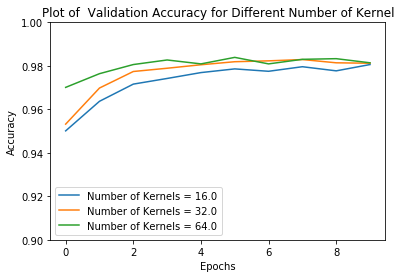

In [ ]:
kernel_no = [16,32, 64]  # Kernel Number
kernel_size = 3          # Kernel Size
neuron_no = 32           # Neuron Number
plt.figure()

for i in range (len(kernel_no)):
    
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(kernel_no[i], kernel_size, activation='relu', input_shape=(28, 28,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(neuron_no , activation='relu')) #dense layer
    model.add(keras.layers.Dense(10)) #output layer
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    
    history=model.fit(train_images, train_labels, epochs=10, batch_size=300, validation_data=(test_images, test_labels),verbose=0)
    plt.plot(history.history['val_accuracy'], label="Number of Kernels = {0:.1f}".format(kernel_no[i]))
    print("Final Testing Accuracy for {0:.1f} kernel numbers =  {1:.4f}". format(kernel_no[i] ,history.history['val_accuracy'][-1]))

plt.legend(loc='best')
plt.ylim(0.9,1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Plot of  Validation Accuracy for Different Number of Kernel")




### Conclusion
As seen in the plot and print values, all three kernel numbers has obtianed a good accuracy. Thus, the lowest kernel number is used as it has lesser parameters increasing the efficiency of our model.

### Different Kernel Size
With the kernel number set to be 16, we now build models with different kernel size (ie. 3x3, 4x4, 5x5)

Final Testing Accuracy for 3.0x3.0 kernel size =  0.9835
Final Testing Accuracy for 4.0x4.0 kernel size =  0.9848
Final Testing Accuracy for 5.0x5.0 kernel size =  0.9852


Text(0.5, 1.0, 'Plot of  Validation Accuracy for Different Kernel Size')

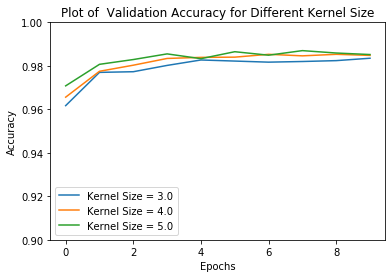

In [ ]:
kernel_no = 32
kernel_size = [3,4,5]
neuron_no = 32
plt.figure()

for i in range (len(kernel_size)):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(kernel_no, kernel_size[i], activation='relu', input_shape=(28, 28,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(neuron_no , activation='relu')) #dense layer
    model.add(keras.layers.Dense(10)) #output layer
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    
    history=model.fit(train_images, train_labels, epochs=10, batch_size=300, validation_data=(test_images, test_labels),verbose=0)
    plt.plot(history.history['val_accuracy'], label="Kernel Size = {0:.1f}".format(kernel_size[i]))
    print("Final Testing Accuracy for {0:.1f}x{0:.1f} kernel size =  {1:.4f}". format(kernel_size[i] ,history.history['val_accuracy'][-1]))

plt.legend(loc='best')
plt.ylim(0.9,1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Plot of  Validation Accuracy for Different Kernel Size")

### Conclusion
As seen in the printed values and plot the Kernel Size of 5x5 gives the best accuracy.

### Different number of neurons
With kernel number set to be 16 and kernel size set to be 5x5, different number of neurons is used (ie. 16, 32, 64)

Final Testing Accuracy for 16.0 neurons =  0.9851
Final Testing Accuracy for 32.0 neurons =  0.9809
Final Testing Accuracy for 64.0 neurons =  0.9837


Text(0.5, 1.0, 'Plot of  Validation Accuracy for Different Number of Neurons')

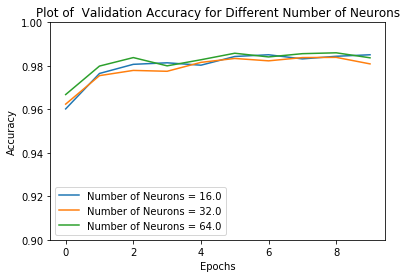

In [ ]:
kernel_no = 16
kernel_size = 5
neuron_no = (16, 32, 64)
plt.figure()

for i in range (len(neuron_no)):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(kernel_no, kernel_size, activation='relu', input_shape=(28, 28,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(neuron_no[i] , activation='relu')) #dense layer
    model.add(keras.layers.Dense(10)) #output layer
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    
    history=model.fit(train_images, train_labels, epochs=10,batch_size=300, validation_data=(test_images, test_labels),verbose=0)
    plt.plot(history.history['val_accuracy'], label="Number of Neurons = {0:.1f}".format(neuron_no[i]))
    print("Final Testing Accuracy for {0:.1f} neurons =  {1:.4f}". format(neuron_no[i] ,history.history['val_accuracy'][-1]))

plt.legend(loc='best')
plt.ylim(0.9,1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Plot of  Validation Accuracy for Different Number of Neurons")

### Conclusion
As seen in the printed value and plot, any neuron number gives a good accuracy. Thus, for simplicity of network the smallest number of neuron is chosen.

### Dropout Layer
A dropout layer is added using `keras.layers.Dropout` to prevent any overfitting.

## Optimum Network

Number of Kernels: 16
<br>
Kernel Size: 5x5
<br>
Number of Neurons: 16
<br>
Drop Out Rate: 0.3

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                170       
Total params: 16,986
Trainable params: 16,986
Non-trainable params: 0
_________________________________________________

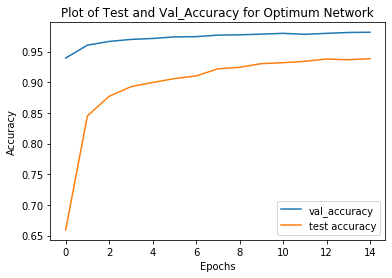

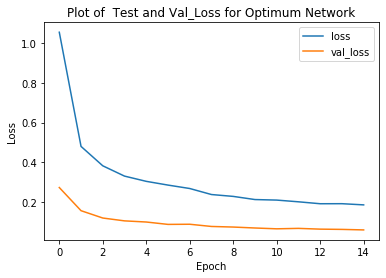

In [ ]:
kernel_no = 16      # Number of Kernel
kernel_size = 5     # Kernel Size
neuron_no = 16      # Number of Neuron
dropout_rate = 0.3  # Drop out Rate

# Creating Model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(kernel_no, kernel_size, activation='relu', input_shape=(28, 28,1)))  # Convolutional Layer
model.add(keras.layers.MaxPooling2D((3, 3)))                                                       # Down Pooling
model.add(keras.layers.Flatten())                                                                  # Flatten input to 1D
model.add(keras.layers.Dense(neuron_no , activation='relu'))                                       # dense layer
model.add(keras.layers.Dropout(dropout_rate))                                                      # Drop Out Layer
model.add(keras.layers.Dense(10))                                                                  # output layer

# Compiling Model with loss and optimizer
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

# Training model with train_images
history=model.fit(train_images, train_labels, epochs=15, batch_size=300, validation_data=(test_images, test_labels),verbose=0)

# Plot of accuracy
plt.figure()
plt.plot(history.history['val_accuracy'], label='val_accuracy')                      # Plot of val_accuracy against epochs
plt.plot(history.history['accuracy'], label='test accuracy')                         # Plot of test accuracy against epochs
plt.legend(loc='best')                                                               # Show legend
plt.xlabel("Epochs")                                                                 # label x axes
plt.ylabel("Accuracy")                                                               # label y axes
plt.title("Plot of Test and Val_Accuracy for Optimum Network")                       # Plot title
print("Final Test Accuracy  =  {0:.4f}". format(history.history['accuracy'][-1]))    # Print final value of test accuracy
print("Final Val_Accuracy  =  {0:.4f}". format(history.history['val_accuracy'][-1])) # Print final value of val_accuracy

# Plot of loss
plt.figure()
plt.plot(history.history['loss'], label='loss')                                   # Plot of test loss against epochs
plt.plot(history.history['val_loss'], label = 'val_loss')                         # Plot of val_loss against epochs
plt.xlabel('Epoch')                                                               # label x axes
plt.ylabel('Loss')                                                                # label y axes
plt.title('Plot of  Test and Val_Loss for Optimum Network')                       # Plot title
plt.legend()
print("Final Test cost value = {0:.4f}".format((history.history['loss'])[-1]))    # Print final value of test loss
print("Final Val_cost value = {0:.4f}".format((history.history['val_loss'])[-1])) # Print final value of val_loss


## Task 2

We are now adding more convolutional network into the model with a slight change of values obtained from the optimum network from **Task 1**.

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
flatten_23 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                16416     
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)              

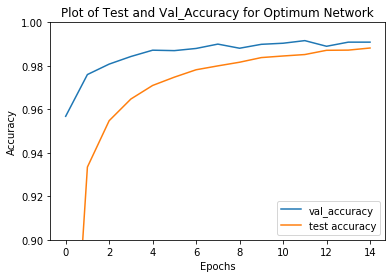

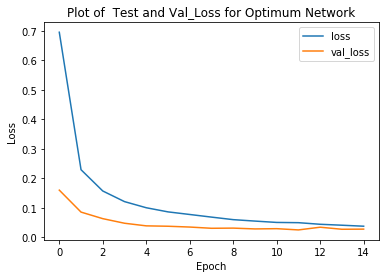

In [ ]:
kernel_no = 32      # Number of Kernel
kernel_size = 5     # Kernel Size
neuron_no = 32      # Number of Neuron
dropout_rate = 0.3  # Drop out Rate

# Creating Model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(kernel_no, kernel_size, activation='relu', input_shape=(28, 28,1)))  # Convolutional Layer
model.add(keras.layers.MaxPooling2D((3, 3)))                                                       # Down pooling
model.add(keras.layers.Conv2D(kernel_no, kernel_size, activation='relu'))                          # Convolutional Layer
model.add(keras.layers.Flatten())                                                                  # Flatten input to 1D
model.add(keras.layers.Dense(neuron_no , activation='relu'))                                       # dense layer
model.add(keras.layers.Dropout(dropout_rate))                                                      # Drop out layer
model.add(keras.layers.Dense(10))                                                                  # output layer

# Compiling Model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

# Training model
history=model.fit(train_images, train_labels, epochs=15, batch_size=300, validation_data=(test_images, test_labels),verbose=0)


# Plot of accuracy
plt.figure()
plt.plot(history.history['val_accuracy'], label='val_accuracy')                      # Plot of val_accuracy against epochs
plt.plot(history.history['accuracy'], label='test accuracy')                         # Plot of test accuracy against epochs
plt.legend(loc='best')                                                               # Show legend
plt.xlabel("Epochs")                                                                 # label x axes
plt.ylabel("Accuracy")                                                               # label y axes
plt.title("Plot of Test and Val_Accuracy for Optimum Network")                       # Plot title
print("Final Test Accuracy  =  {0:.4f}". format(history.history['accuracy'][-1]))    # Print final value of test accuracy
print("Final Val_Accuracy  =  {0:.4f}". format(history.history['val_accuracy'][-1])) # Print final value of val_accuracy

# Plot of loss
plt.figure()
plt.plot(history.history['loss'], label='loss')                                   # Plot of test loss against epochs
plt.plot(history.history['val_loss'], label = 'val_loss')                         # Plot of val_loss against epochs
plt.xlabel('Epoch')                                                               # label x axes
plt.ylabel('Loss')                                                                # label y axes
plt.title('Plot of  Test and Val_Loss for Optimum Network')                       # Plot title
plt.legend()
print("Final Test cost value = {0:.4f}".format((history.history['loss'])[-1]))    # Print final value of test loss
print("Final Val_cost value = {0:.4f}".format((history.history['val_loss'])[-1])) # Print final value of val_loss


# Conclusion

With an additional layer of concolutional layer we are able to achieve a higher accuracy with model.